In [1]:
import scanpy.api as sc
import numpy as np
import pandas as pd
import bbknn
import time

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)

/Users/kp9/anaconda3/envs/orig/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Perform the actual BBKNN with faiss benchmark. Import the PCA, create a batch vector matching what was in R, run the same BBKNN function, except with faiss. When done, write the times out in the same manner as well.

In [2]:
faiss_time = []

for i in np.arange(10,19):
    pca = np.load('pca'+str(i)+'.npy')
    batch = ['a']*2**i + ['b']*2**i
    t1 = time.time()
    bbknn.bbknn_pca_matrix(pca=pca,batch_list=batch,approx=False)
    t2 = time.time()
    faiss_time.append(t2-t1)

with open('benchmark-times/faiss.txt','w') as fid:
    fid.writelines([str(i)+'\n' for i in faiss_time])

computing batch balanced neighbors
    finished (0:00:00.17) computing batch balanced neighbors
    finished (0:00:00.32) computing batch balanced neighbors
    finished (0:00:00.62) computing batch balanced neighbors
    finished (0:00:01.56) computing batch balanced neighbors
    finished (0:00:03.70) computing batch balanced neighbors
    finished (0:00:09.52) computing batch balanced neighbors
    finished (0:00:29.86) computing batch balanced neighbors
    finished (0:01:42.72) computing batch balanced neighbors
    finished (0:06:16.68) 

Time for plotting. Use the scanpy plot configuration as it's nice.

In [3]:
import matplotlib.pyplot as plt

sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

Read in the run times from the files created along the way.

In [4]:
times = {}
for alg in ['annoy','bbknn','cca','faiss','harmony','mnn','scanorama']:
    times[alg] = pd.read_table('benchmark-times/'+alg+'.txt',header=None).values

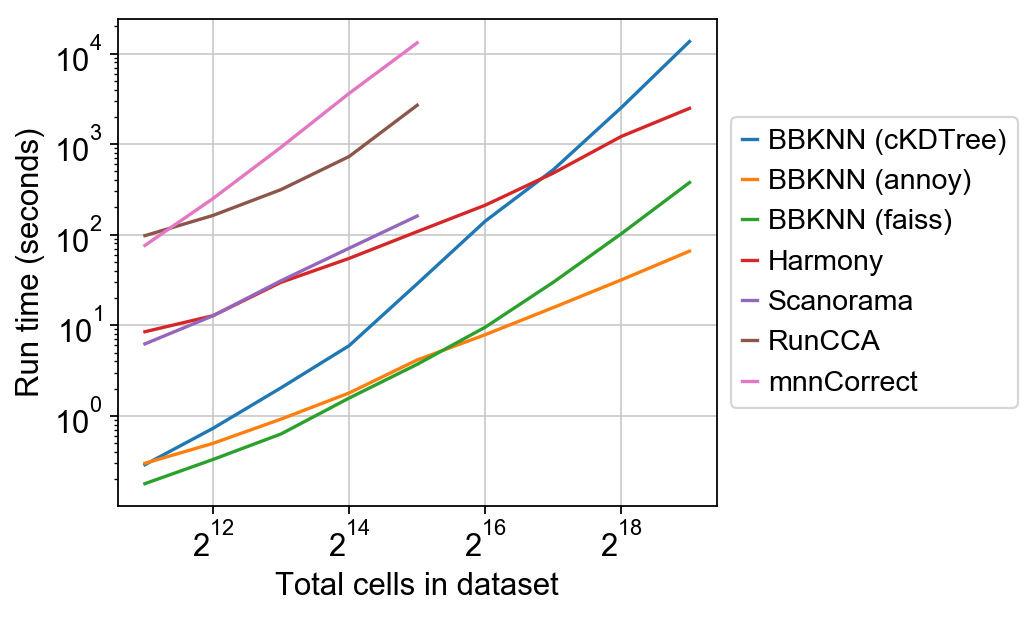

In [5]:
fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)

plt.plot(2**np.arange(11,20),times['bbknn'])
plt.plot(2**np.arange(11,20),times['annoy'])
plt.plot(2**np.arange(11,20),times['faiss'])
plt.plot(2**np.arange(11,20),times['harmony'])
plt.plot(2**np.arange(11,16),times['scanorama'])
plt.plot(2**np.arange(11,16),times['cca'])
plt.plot(2**np.arange(11,16),times['mnn'])
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=10)
plt.xlabel('Total cells in dataset')
plt.ylabel('Run time (seconds)')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(['BBKNN (cKDTree)','BBKNN (annoy)','BBKNN (faiss)',
           'Harmony','Scanorama','RunCCA','mnnCorrect'], loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()